<a href="https://colab.research.google.com/github/HatumSEO/SEO_Scripts/blob/main/BENCHAMARCK_1_0_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BENCHMARCK 1.0.1

## Instalar módulos requeridos
Tardará un par de minutos

In [ ]:
#@title Instalar Selenium y paquetes requeridos
# instalar Selenium
!pip install selenium
!apt-get update;
!apt install chromium-chromedriver;

# importar herramientas
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import WebDriverException
import pandas as pd
import time
from datetime import datetime
fecha = datetime.today().strftime('%Y%m%d %H:%M')
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import re
import random
from tqdm import tqdm
from selenium.webdriver.common.keys import Keys
print()
print("Ya terminó de instalar")

     |████████████████████████████████| 968 kB 7.5 MB/s 
     |████████████████████████████████| 138 kB 57.6 MB/s 
     |████████████████████████████████| 359 kB 50.2 MB/s 
     |████████████████████████████████| 55 kB 5.2 MB/s 
     |████████████████████████████████| 3.6 MB 51.5 MB/s 
     |████████████████████████████████| 58 kB 7.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.9 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:2 https://cloud.r-

## Extraer datos

### <font color='#7312f3'>Subir archivo "Excel" con el listado de Keywords<font>
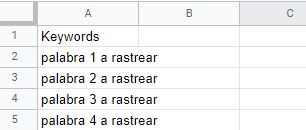

In [ ]:
#@markdown En la **columna A**; la celda A1 debe contener la palabra "**Keywords**" y luego el **listado de keywords**.
Archivo = "/content/lista de keywords.xlsx" #@param {type:"string"}

# tablas en colab
from google.colab import data_table
from vega_datasets import data

data_table.enable_dataframe_formatter()

#keywords_df = pd.read_csv(Archivo, encoding='utf-8')
keywords_df = pd.read_excel(Archivo)
lista_keywords = keywords_df['Keywords']
keywords_df

,Keywords
0,tecnico en ciberseguridad
1,técnico en ciberseguridad sueldo chile
2,técnico de nivel superior en ciberseguridad
3,técnico en ciberseguridad inacap
4,tecnico en ciberseguridad trabajo
5,cuanto gana un tecnico en ciberseguridad
6,técnico en ciberseguridad chile
7,técnico en ciberseguridad sueldo
8,tecnico superior ciberseguridad
9,tecnico de ciberseguridad


In [ ]:
#@title <font color='#7312f3'>Abrir un navagador Chrome virtual<font>
#Google = "www.google.com.co" #@param {type:"string"}
#@markdown <font color='orange'>¿En qué país deseas buscar?

#@markdown Ingresa el código del país para buscar en Google (Ejmeplo: **Argentina = ar, Perú = pe, México = mx**). _Revisa los codigos de idioma [ISO 639-1](https://es.wikipedia.org/wiki/ISO_639-1)_
País = "cl" #@param {type:"string"}
#@markdown <font color='orange'>¿Cuántos resultados deseas obtener en la SERP?

#@markdown Dejar "Nro_resultados" en "**0**" para cargar la primera página de resultados por defecto
#Nro_resultados =  20#@param {type:"raw"}
Nro_resultados = 0 #@param {type:"slider", min:0, max:100, step:1}

# Provar driver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
options.add_argument('--incognito')
driver = webdriver.Chrome('chromedriver',options=options)

# Abriendo un nuevo navegador
try:
    # abrir Google en el pais seleccionado
    #google = Google
    pais = País
    resultados = Nro_resultados
    if resultados:
        url = f'https://www.google.com/search?q=google&oq=google&gl={pais}&num={resultados}'
    else:
        url = f'https://www.google.com/search?q=google&oq=google&gl={pais}'
    driver.get(url)
    
    buscador = driver.find_element_by_xpath('//input[@name="q"]')
    buscador.clear()
    buscador.send_keys('hola')
    buscador.send_keys(Keys.ENTER)
    print()
    print('🟢 Navegador listo para empezar')
except:
    print()
    print('🔴 No se ha podido cargar el navegador')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead



🟢 Navegador listo para empezar


In [ ]:
#@title <font color='#7312f3'>Empezar a escrapear<font>

# Creando el Dataframe General
df = pd.DataFrame(columns=['Fecha', 'Keyword', 'Posicion', 'URL', 'Title', 'Sitio'])
# Creando lista para keywords que no han sido screapeadas
listaPageDown = []

def scraper(df, keyword):
    sleep_time = random.randint(4, 10)
    keyword = str(keyword)
    time.sleep(sleep_time)
    pos = 1
    
    # ================ provando que Google no ha bloqueado =============
    try:
        buscador = driver.find_element_by_xpath('//input[@name="q"]')
        buscador.clear()
        buscador.send_keys(keyword)
        buscador.send_keys(Keys.ENTER)
    except:
        return df
    
    
    # ========== empezando a escrapear ========
    fecha = datetime.today().strftime('%Y%m%d %H%M')
    #SOUP
    soup = BeautifulSoup(driver.page_source, 'lxml')
    
    # Creamos la lista base para añadri al DF
    lista_df = [fecha, keyword]
    
    # seleccionar solo la SERP
    serp = soup.find('div', {'id': 'rcnt'})
    
    # eliminar lado derecho
    try:
        soup.find('div', {'id': 'rhs'}).decompose()
    except:
        None

    try:
    # eliminamos anuncios de la parte superior
        serp.find('div', {'id': 'taw'}).decompose()
    # eliminamos anuncios de la parte inferior
        serp.find('div', {'id': 'bottomads'}).decompose()
    except:
      None

    # =========== fragmento destacado
    try:
        serp_frag_destacado = serp.find_all('div', {'class': 'mnr-c'})
        #Url fragmento destacado
        serp_frag_destacado = serp_frag_destacado[0].find('div', {'class' : 'g'})
        url_serp_frag_destacado = serp_frag_destacado.find('a')['href']
        url_serp_frag_destacado = re.findall('(.*)#:~', url_serp_frag_destacado)
        # añadiendo posicion
        lista_df.append(pos)
        # añadiendo URL
        lista_df.append(url_serp_frag_destacado[0])
        #title fragmento destacado   
        title_frag_desta = serp_frag_destacado.find('h3').text
        lista_df.append(title_frag_desta)
        # añadir dominio
        lista_df.append(urlparse(url_serp_frag_destacado[0]).netloc)
        # añadir al Data Frame
        df.loc[len(df)] = lista_df
        #eliminar fragmento destacado
        serp.find_all('div', {'class': 'mnr-c'})[0].decompose()
        pos += 1
    except:
        None
    
    # eliminar Preguntas relacionadas
    try:
        serp.find_all('div', {'class': 'Wt5Tfe'})[0].decompose()
    except:
        None
    
    # ============= serps URL orgánico
    try:
        serp_url_organico = serp.find_all('div', {'class': 'yuRUbf'})
        for i in serp_url_organico:
            # lista para Data Frame
            lista_df = [fecha, keyword, pos]
            # URL
            lista_df.append(i.find('a')['href'])
            # Title
            lista_df.append(i.find('h3').text)
            # Dominio
            lista_df.append(urlparse(i.find('a')['href']).netloc)
            # añadir al Data Frame
            df.loc[len(df)] = lista_df
            # incrementar posicion
            pos += 1
    except:
        None
    return df

# Scrapear
interno = 1
filas_a = 0

for k in tqdm(lista_keywords):
    if interno < 15:
        interno += 1
    else:
        print('Esperando 8 minutos, sino Google bloquea el escrapeo')
        time.sleep(480)
        interno = 1
    
    df = scraper(df, k) 
    filas = len(df)
    if filas == filas_a:
        listaPageDown.append(k)
        print(f'NO se ha posido escrapear: {k}')
        #driver.close()
        #time.sleep(20)
        #driver = webdriver.Chrome('chromedriver',options=options)
        #if resultados:
            #url = f'https://{google}/search?q=google&oq=google&gl={pais}&num={resultados}'
        #else:
            #url = f'https://{google}/search?q=google&oq=google&gl={pais}'
        #driver.get(url)
    
    filas_a = filas
    #print(f'Filas : {filas}')
print(listaPageDown)

df

  0%|          | 0/37 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: find_element_by_xpath is deprecated. Please use find_element(by=By.XPATH, value=xpath) instead
  app.launch_new_instance()
 38%|███▊      | 14/37 [02:06<03:23,  8.84s/it]

Esperando 8 minutos, sino Google bloquea el escrapeo


 78%|███████▊  | 29/37 [12:17<01:19,  9.94s/it]

Esperando 8 minutos, sino Google bloquea el escrapeo


100%|██████████| 37/37 [21:29<00:00, 34.84s/it]

[]


,Fecha,Keyword,Posicion,URL,Title,Sitio
0,20220415 0253,tecnico en ciberseguridad,1,https://www.iacc.cl/carrera/tecnico-de-nivel-s...,Técnico de Nivel Superior en Ciberseguridad | ...,www.iacc.cl
1,20220415 0253,tecnico en ciberseguridad,2,https://ipp.cl/tecnico-en-ciberseguridad/,Técnico en Ciberseguridad Admisión 2022 | Estu...,ipp.cl
2,20220415 0253,tecnico en ciberseguridad,3,https://ciisa.cl/tecnico-en-ciberseguridad/,Técnico en Ciberseguridad – Instituto Profesio...,ciisa.cl
3,20220415 0253,tecnico en ciberseguridad,4,https://ipleones.cl/carrera/tecnico-cibersegur...,Técnico en Ciberseguridad - IPLeones,ipleones.cl
4,20220415 0253,tecnico en ciberseguridad,5,https://www.cftsanagustin.cl/carreras_tecnicas...,Técnico en Ciberseguridad - CFT San Agustín,www.cftsanagustin.cl
...,...,...,...,...,...,...
350,20220415 0315,tecnico en ciberseguridad cenfotec,4,https://www.ucenfotec.ac.cr/,Cenfotec,www.ucenfotec.ac.cr
351,20220415 0315,tecnico en ciberseguridad cenfotec,5,https://www.ucenfotec.ac.cr/programas/maestria...,Maestría en Ciberseguridad - Cenfotec,www.ucenfotec.ac.cr
352,20220415 0315,tecnico en ciberseguridad cenfotec,6,https://www.ucenfotec.ac.cr/cursos-de-actualiz...,Principios de ciberseguridad (Lead Cybersecuri...,www.ucenfotec.ac.cr
353,20220415 0315,tecnico en ciberseguridad cenfotec,7,https://universidades.cr/universidades/univers...,Técnico en Ciberseguridad - Universidad Cenfotec,universidades.cr


## Generar Benchmarck

In [ ]:
#@title <font color='#7312f3'>Todos tus competidores<font>
#@markdown Tabla general de todos los sitios ordenados por **Visibilidad** del 1 al 100%

# Import seaborn
import seaborn as sns
# Apply the default theme
sns.set_theme()

# Generar nuevo DF
dom = df['Sitio'].value_counts()
print('Sacando promedios...')
df_dom = pd.DataFrame(dom)
promedios = [df[df['Sitio'] == d]['Posicion'].mean() for d in tqdm(dom.index)]
df_dom['Promedio'] = promedios
df_dom['Promedio'] = df_dom['Promedio'].round(1)
df_dom.rename(columns={'Sitio': 'Conteo'}, inplace=True)

# Porcentaje visibilidad
#=SI(F2<=1,0.37,SI(F2<=2,0.13,SI(F2<=3,0.07,SI(F2<=4,0.05,SI(F2<=5,0.03,SI(F2<=6,0.02,0.01))))))
def visibilidad(conteo, promedio):
  # Rank
  rank = conteo * promedio
  # Visivilidad CTR
  visi = 0
  p = round(promedio)
  if p == 1:
    visi = 37 * rank
  elif p == 2:
    visi = 13 * rank
  elif p == 3:
    visi = 7 * rank
  elif p == 4:
    visi = 5 * rank
  elif p == 5:
    visi = 3 * rank
  elif p == 6:
    visi = 2 * rank
  else:
    visi = 1 * rank
  return visi

df_dom['Visibilidad %'] = df_dom.apply(lambda x: visibilidad(x.Conteo, x.Promedio), axis = 1)

# combirtiendo a base 10
total = max(df_dom['Visibilidad %'])

def base_10(dato):
  visi_10 = dato/total
  visi_10 = visi_10*100
  return round(visi_10)

df_dom['Visibilidad %'] = df_dom['Visibilidad %'].apply(lambda x: base_10(x))

# Ordenar Columnas
df_dom = df_dom.reindex(columns=['Visibilidad %', 'Conteo', 'Promedio'])
df_dom = df_dom.sort_values('Visibilidad %', ascending=False)
df_dom

Sacando promedios...


100%|██████████| 113/113 [00:00<00:00, 1854.87it/s]


,Visibilidad %,Conteo,Promedio
www.iacc.cl,100,18,2.2
ipp.cl,78,20,4.0
ciisa.cl,76,19,4.1
ipleones.cl,57,13,4.5
www.ucenfotec.ac.cr,40,9,3.3
...,...,...,...
admision.aiep.cl,1,1,7.0
admision.ciisa.cl,1,1,7.0
factorcapitalhumano.com,1,1,7.0
www.inacap.cl,1,1,7.0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_gu

,Visibilidad %,Conteo,Promedio
www.iacc.cl,100,18,2.2
ipp.cl,78,20,4.0
ciisa.cl,76,19,4.1
ipleones.cl,57,13,4.5
cl.linkedin.com,36,13,4.8
cl.indeed.com,21,10,5.5


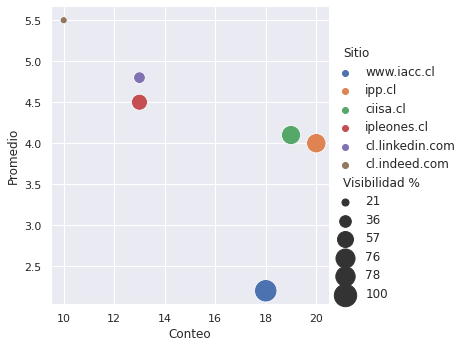

In [ ]:
#@title <font color='#7312f3'>Mejores sitios de competidores<font>
#Google = "www.google.com.co" #@param {type:"string"}
#@markdown <font color='orange'>Escribe los límites después de ver la tabla anterior.

# Generar nuevo DF
#@markdown ¿Cuántas veces como mínimo debe aparecer el sitio de los competidores?
conteo_min = 10 #@param {type:"number"}
#@markdown ¿Qué posicionamiento promedio como máximo deberían tener los competidores?
promedio_max =  6#@param {type:"number"}

# Cálculos
dom2_df = df_dom[(df_dom['Conteo'] >= conteo_min) & (df_dom['Promedio'] <= promedio_max)]
dom2_df['Sitio'] = dom2_df.index

# graficar
dom2_df['Sitio'] = dom2_df.index
sns.relplot(data=dom2_df, x="Conteo", y="Promedio", hue="Sitio", size='Visibilidad %', sizes=(50, 500))

# mostar tabla
dom2_df.drop(['Sitio'], axis=1, inplace=True)
dom2_df

In [ ]:
#@title <font color='#7312f3'>Genenar Benchmarck<font>
#Google = "www.google.com.co" #@param {type:"string"}
#@markdown Añade tu Sitio
Sitio_propio = "ipp.cl" #@param {type:"string"}
#@markdown Añade los sitios (1 a 10)
Competidor_1 = "www.iacc.cl" #@param {type:"string"}
Competidor_2 = "ciisa.cl" #@param {type:"string"}
Competidor_3 = "ipleones.cl" #@param {type:"string"}
Competidor_4 = "cl.linkedin.com" #@param {type:"string"}
Competidor_5 = "cl.indeed.com" #@param {type:"string"}
Competidor_6 = "" #@param {type:"string"}
Competidor_7 = "" #@param {type:"string"}
Competidor_8 = "" #@param {type:"string"}
Competidor_9 = "" #@param {type:"string"}
Competidor_10 = "" #@param {type:"string"}

#@markdown ¿Qué deseas mostrar cuando un sitio no posiciona para una keyword?
No_posiciona = ">100" #@param {type:"string"}

# Lista de competidores
list_sitios = []
if Sitio_propio:
  list_sitios.append(Sitio_propio)
if Competidor_1:
  list_sitios.append(Competidor_1)
if Competidor_2:
  list_sitios.append(Competidor_2)
if Competidor_3:
  list_sitios.append(Competidor_3)
if Competidor_4:
  list_sitios.append(Competidor_4)
if Competidor_5:
  list_sitios.append(Competidor_5)
if Competidor_6:
  list_sitios.append(Competidor_6)
if Competidor_7:
  list_sitios.append(Competidor_7)
if Competidor_8:
  list_sitios.append(Competidor_8)
if Competidor_9:
  list_sitios.append(Competidor_9)
if Competidor_10:
  list_sitios.append(Competidor_10)

# Creando DataFrame de Benchmarck
keywords = df['Keyword'].unique()
serp_comp = pd.DataFrame(keywords, columns=['Keyword'])

for compe in list_sitios:
  print(compe)
  p_temp = []
  for keyword in tqdm(keywords):
    pos_comp_keyword = df[(df['Sitio'] == compe) & (df['Keyword'] == keyword)]['Posicion']
    pos_comp_keyword = pos_comp_keyword.head(1)
    if pos_comp_keyword.empty:
      p_temp.append(No_posiciona)
    else:
      p_temp.append(pos_comp_keyword.to_string(index=False).strip())          
  serp_comp[compe] = p_temp
serp_comp


ipp.cl


100%|██████████| 37/37 [00:00<00:00, 874.44it/s]


www.iacc.cl


100%|██████████| 37/37 [00:00<00:00, 937.55it/s]


ciisa.cl


100%|██████████| 37/37 [00:00<00:00, 1028.02it/s]


ipleones.cl


100%|██████████| 37/37 [00:00<00:00, 1079.42it/s]


cl.linkedin.com


100%|██████████| 37/37 [00:00<00:00, 1126.43it/s]


cl.indeed.com


100%|██████████| 37/37 [00:00<00:00, 910.92it/s]


,Keyword,ipp.cl,www.iacc.cl,ciisa.cl,ipleones.cl,cl.linkedin.com,cl.indeed.com
0,tecnico en ciberseguridad,2,1,3,4,7,>100
1,técnico en ciberseguridad sueldo chile,>100,>100,>100,>100,10,3
2,técnico de nivel superior en ciberseguridad,2,1,7,3,>100,>100
3,técnico en ciberseguridad inacap,>100,>100,>100,>100,>100,>100
4,tecnico en ciberseguridad trabajo,>100,>100,>100,>100,1,5
5,cuanto gana un tecnico en ciberseguridad,>100,>100,>100,>100,>100,6
6,técnico en ciberseguridad chile,2,3,1,4,5,>100
7,técnico en ciberseguridad sueldo,>100,>100,>100,>100,>100,4
8,tecnico superior ciberseguridad,2,1,6,3,>100,>100
9,tecnico de ciberseguridad,2,1,3,4,7,>100


## Guardar archivos

In [ ]:
#@title <font color='#7312f3'>Descargar archivos en Excel<font>
#@markdown <font color='orange'>¿Qué deseas descargar?

#@markdown **Total Escrapeo**: Los datos escrapeados base.

#@markdown **Competidores**: Todos los competidores y % de visibilidad. 

#@markdown **Benchmarck**: El Benchmarck.

from google.colab import files

Descargar = "Benchmarck" #@param ["Total Escrapeo", "Competidores", "Benchmarck"]
if Descargar == 'Total Escrapeo':
  df.to_excel('Total Escrapeo.xlsx')
  files.download('Total Escrapeo.xlsx')
elif Descargar == 'Competidores':
  df_dom.to_excel('Competidores.xlsx')
  files.download('Competidores.xlsx')
elif Descargar == 'Benchmarck':
  serp_comp.to_excel('Benchmarck.xlsx')
  files.download('Benchmarck.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>